In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

C:\Users\jmo4cob\AppData\Local\conda\conda\envs\tf\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import sys
import tensorflow as tf
import numpy as np
sys.version

'3.5.4 |Anaconda, Inc.| (default, Nov  8 2017, 14:34:30) [MSC v.1900 64 bit (AMD64)]'

In [3]:
batch_size = 128
num_classes = 10
epochs = 12

In [4]:
# input image dimensions
img_rows, img_cols = 28, 28

[Dataset](https://s3.amazonaws.com/img-datasets/mnist.npz)

In [5]:
myData = np.load('datasets/mnist.npz')

In [6]:
x_train, y_train = myData['x_train'], myData['y_train']
x_test, y_test = myData['x_test'], myData['y_test']

Digit Image - 3


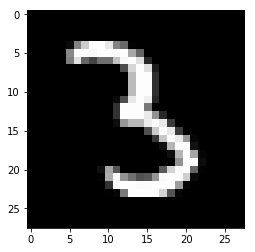

In [7]:
print('Digit Image - {}'.format(y_train[51030]))
plt.imshow(x_train[51030].reshape(28,28), cmap='gist_gray')
plt.show()

In [8]:
K.image_data_format() #changes with backend - Tensorflow or Theano 

'channels_last'

In [9]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [10]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [11]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [12]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [13]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [14]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [15]:
print(keras.__version__)
print(tf.__version__)

2.2.4
1.10.0


In [16]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               204928    
__________

In [17]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 8s 137us/step - loss: 0.3000 - acc: 0.9066 - val_loss: 0.0651 - val_acc: 0.9784
Epoch 2/12
60000/60000 [==============================] - 3s 53us/step - loss: 0.1061 - acc: 0.9687 - val_loss: 0.0432 - val_acc: 0.9866
Epoch 3/12
60000/60000 [==============================] - 3s 54us/step - loss: 0.0798 - acc: 0.9770 - val_loss: 0.0356 - val_acc: 0.9885
Epoch 4/12
60000/60000 [==============================] - 3s 54us/step - loss: 0.0655 - acc: 0.9805 - val_loss: 0.0340 - val_acc: 0.9893
Epoch 5/12
60000/60000 [==============================] - 3s 53us/step - loss: 0.0579 - acc: 0.9828 - val_loss: 0.0287 - val_acc: 0.9906
Epoch 6/12
60000/60000 [==============================] - 3s 53us/step - loss: 0.0539 - acc: 0.9837 - val_loss: 0.0275 - val_acc: 0.9912
Epoch 7/12
60000/60000 [==============================] - 3s 53us/step - loss: 0.0462 - acc: 0.9857 - val_loss: 0.0265 - val_ac

In [18]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0218154001411247
Test accuracy: 0.9934


In [19]:
model.save('.\model\myModel_MNIST.h5')